In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_df = pd.read_csv("/kaggle/input/titanic/train.csv")
test_df = pd.read_csv("/kaggle/input/titanic/test.csv")

In [3]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
train_df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [5]:
train_df = train_df.drop("Cabin", axis=1)
train_df.drop("Name", axis=1, inplace=True)
train_df.drop("Ticket", axis=1, inplace=True)
train_df.set_index("PassengerId", inplace=True)

In [6]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,S
888,1,1,female,19.0,0,0,30.0000,S
889,0,3,female,NaN,1,2,23.4500,S


In [7]:
train_df.count()

Survived    891
Pclass      891
Sex         891
Age         714
SibSp       891
Parch       891
Fare        891
Embarked    889
dtype: int64

In [8]:
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)

In [9]:
train_df["Embarked"].fillna(train_df["Embarked"].mode()[0], inplace=True)

In [10]:
train_df.count()

Survived    891
Pclass      891
Sex         891
Age         891
SibSp       891
Parch       891
Fare        891
Embarked    891
dtype: int64

# Visualisation

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,S
888,1,1,female,19.0,0,0,30.0000,S
889,0,3,female,28.0,1,2,23.4500,S


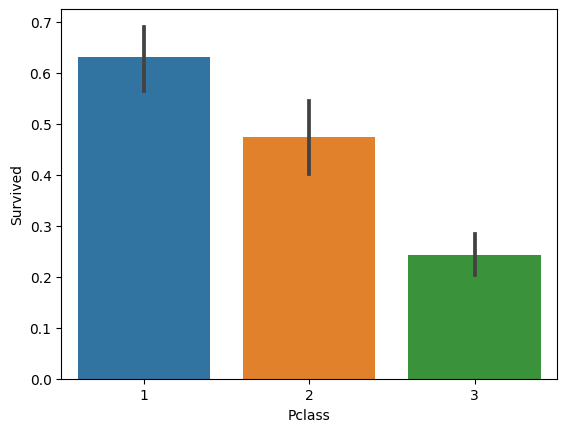

In [12]:
sns.barplot(x="Pclass", y="Survived", data=train_df);

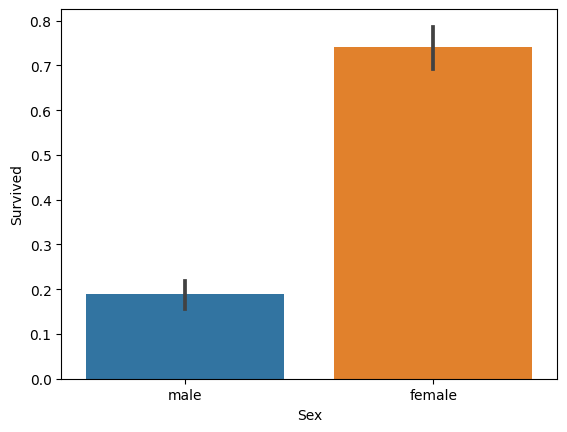

In [13]:
sns.barplot(x="Sex", y="Survived", data=train_df);

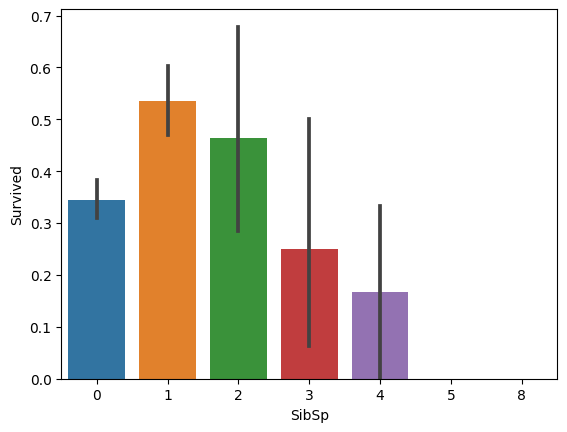

In [14]:
sns.barplot(x="SibSp", y="Survived", data=train_df);

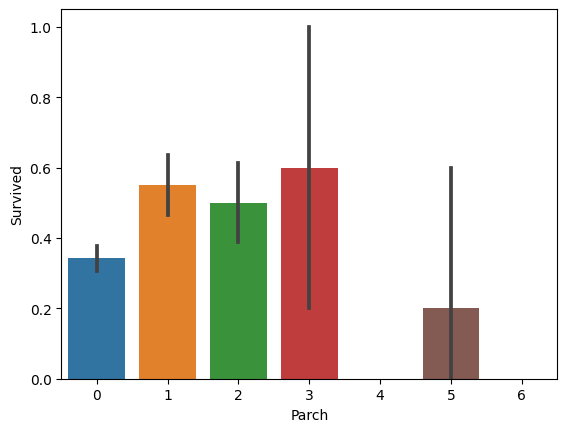

In [15]:
sns.barplot(x="Parch", y="Survived", data=train_df);

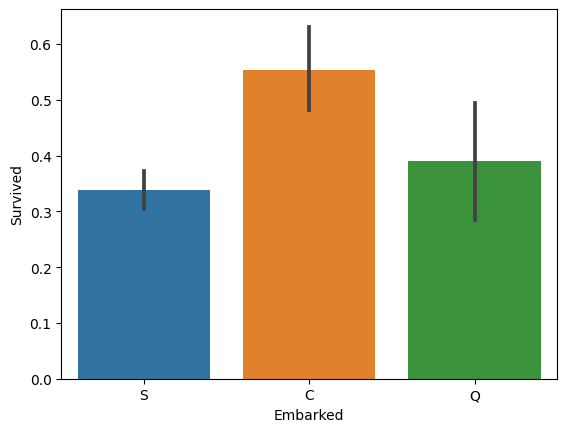

In [16]:
sns.barplot(x="Embarked", y="Survived", data=train_df);

In [17]:
bins = [0, 18, 30, 60, 100]
labels = ["kid", "youth", "adult", "senior"]
train_df["AgeCategory"] = pd.cut(train_df['Age'], bins=bins, labels=labels, right=False)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


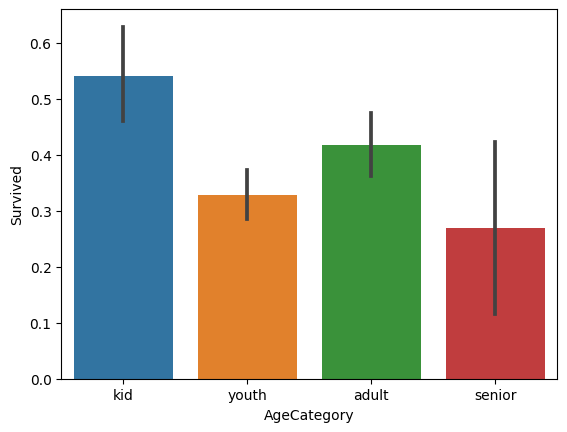

In [18]:
sns.barplot(x="AgeCategory", y="Survived", data=train_df);

In [19]:
train_df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [20]:
bins = [0, 15, 40, 600]
labels = ["cheep", "middle", "expensive"]
train_df["FareCategory"] = pd.cut(train_df['Fare'], bins=bins, labels=labels, right=False)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


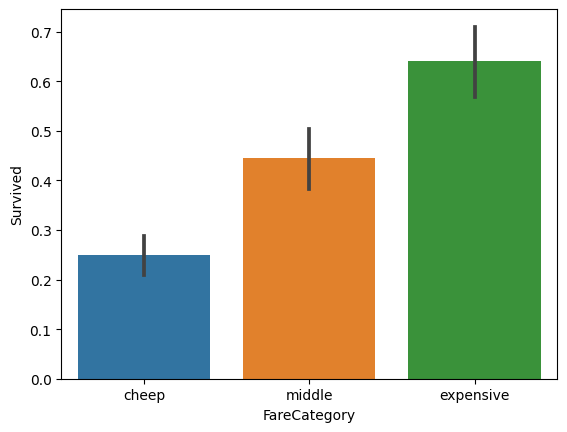

In [21]:
sns.barplot(x="FareCategory", y="Survived", data=train_df);

In [22]:
train_df.drop("AgeCategory", inplace=True, axis=1)
train_df.drop("FareCategory", inplace=True, axis=1)

In [23]:
train_df["Embarked"].describe()

count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object

# Modeling

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})
train_df['Embarked'] = train_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [26]:
X = train_df.drop("Survived", axis=1)
y = train_df["Survived"]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
models_accuracy = dict()

In [29]:
%%time
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

grid_params_decision_tree = {
    "criterion" : ["gini", "entropy", "log_loss"],
    "splitter" : ["best", "random"],
    "max_depth": list(range(2, 8, 2)) + list(range(14, 18, 2)),
    "min_samples_split": list(range(2, 8, 2)) + list(range(14, 18, 2)),
    "min_samples_leaf": list(range(1, 9, 2)) + list(range(13, 15, 2)),
    'max_features': ['sqrt', 'log2', None],
    'random_state': [42],
    'max_leaf_nodes': list(range(80, 102, 4)),
    'ccp_alpha': np.linspace(4e-05, 6e-05, 2)
}
tree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=tree, param_grid=grid_params_decision_tree, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 27000 candidates, totalling 135000 fits
CPU times: user 1min 4s, sys: 2.44 s, total: 1min 7s
Wall time: 5min 27s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'ccp_alpha': array([4.e-05, 6.e-05]),
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 4, 6, 14, 16],
                         'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [80, 84, 88, 92, 96, 100],
                         'min_samples_leaf': [1, 3, 5, 7, 13],
                         'min_samples_split': [2, 4, 6, 14, 16],
                         'random_state': [42], 'splitter': ['best', 'random']},
             scoring='accuracy', verbose=1)

In [30]:
print("Best Parameters found:")
print(grid_search.best_params_)
print("Best Accuracy Score:")
print(grid_search.best_score_)

Best Parameters found:
{'ccp_alpha': 4e-05, 'criterion': 'gini', 'max_depth': 6, 'max_features': None, 'max_leaf_nodes': 80, 'min_samples_leaf': 1, 'min_samples_split': 14, 'random_state': 42, 'splitter': 'random'}
Best Accuracy Score:
0.8286319314488327


In [31]:
grid_base_params = {'ccp_alpha': 4e-05, 
                    'criterion': 'gini', 
                    'max_depth': 6, 
                    'max_features': None, 
                    'max_leaf_nodes': 80, 
                    'min_samples_leaf': 1, 
                    'min_samples_split': 14, 
                    'random_state': 42, 
                    'splitter': 'random'}
base_estimator = DecisionTreeClassifier(**grid_base_params)

In [32]:
from sklearn.metrics import accuracy_score
pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(accuracy)
models_accuracy["DecisionTree"] = [grid_search.best_estimator_, accuracy]

0.776536312849162


In [33]:
%%time
from sklearn.ensemble import BaggingClassifier
param_grid_bagging = {
    'n_estimators': range(50, 351, 50),
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0]
}
bagging = BaggingClassifier(estimator=base_estimator, random_state=42)

grid_search = GridSearchCV(estimator=bagging, param_grid=param_grid_bagging, scoring="accuracy", n_jobs=-1, cv=5, verbose=1)
grid_search.fit(X_train, y_train)
print("Best Parameters found:")
print(grid_search.best_params_)
print("Best Accuracy Score:")
print(grid_search.best_score_)

Fitting 5 folds for each of 63 candidates, totalling 315 fits
Best Parameters found:
{'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 100}
Best Accuracy Score:
0.8286417807544568
CPU times: user 1.52 s, sys: 191 ms, total: 1.71 s
Wall time: 59.4 s


In [34]:
pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(accuracy)
models_accuracy["Bagging"] = [grid_search.best_estimator_, accuracy]

0.8100558659217877


In [35]:
%%time
from sklearn.ensemble import RandomForestClassifier
param_grid_rf = {
    'n_estimators': range(60, 361, 50),
    'max_features': ['sqrt', 'log2', None]
}
random_forest = RandomForestClassifier(
    criterion=grid_base_params['criterion'],
    max_depth=grid_base_params['max_depth'],
    min_samples_split=grid_base_params['min_samples_split'],
    min_samples_leaf=grid_base_params['min_samples_leaf'],
    max_leaf_nodes=grid_base_params['max_leaf_nodes'],
    ccp_alpha=grid_base_params['ccp_alpha'],
    random_state=42
)
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid_bagging, scoring="accuracy", n_jobs=-1, cv=5, verbose=1)
grid_search.fit(X_train, y_train)
print("Best Parameters found:")
print(grid_search.best_params_)
print("Best Accuracy Score:")
print(grid_search.best_score_)

Fitting 5 folds for each of 63 candidates, totalling 315 fits
Best Parameters found:
{'max_features': 0.7, 'max_samples': 0.7, 'n_estimators': 100}
Best Accuracy Score:
0.832837584950261
CPU times: user 1.28 s, sys: 153 ms, total: 1.44 s
Wall time: 51.3 s


In [36]:
pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(accuracy)
models_accuracy["RandomForest"] = [grid_search.best_estimator_, accuracy]

0.7988826815642458


In [37]:
%%time
from sklearn.ensemble import ExtraTreesClassifier

param_grid_et = {
    'n_estimators': range(50, 351, 50),
    'max_features': ['sqrt', 'log2', None]
}

et_model = ExtraTreesClassifier(
    criterion=grid_base_params['criterion'],
    max_depth=grid_base_params['max_depth'],
    min_samples_split=grid_base_params['min_samples_split'],
    min_samples_leaf=grid_base_params['min_samples_leaf'],
    max_leaf_nodes=grid_base_params['max_leaf_nodes'],
    ccp_alpha=grid_base_params['ccp_alpha'],
    random_state=42
)
grid_search = GridSearchCV(estimator=et_model, param_grid=param_grid_et, scoring="accuracy", n_jobs=-1, cv=5, verbose=1)
grid_search.fit(X_train, y_train)
print("Best Parameters found:")
print(grid_search.best_params_)
print("Best Accuracy Score:")
print(grid_search.best_score_)

Fitting 5 folds for each of 21 candidates, totalling 105 fits
Best Parameters found:
{'max_features': None, 'n_estimators': 150}
Best Accuracy Score:
0.8314586821629074
CPU times: user 523 ms, sys: 48.2 ms, total: 572 ms
Wall time: 13.2 s


In [38]:
pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(accuracy)
models_accuracy["ExtraTrees"] = [grid_search.best_estimator_, accuracy]

0.8044692737430168


In [39]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='liblinear')
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best Parameters found:")
print(grid_search.best_params_)
print("Best Accuracy Score:")
print(grid_search.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters found:
{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Accuracy Score:
0.8005220131980696


In [40]:
pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(accuracy)

models_accuracy["LogisticRegression"] = [grid_search.best_estimator_, accuracy]

0.7988826815642458


In [41]:
%%time
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best Parameters found:")
print(grid_search.best_params_)
print("Best Accuracy Score:")
print(grid_search.best_score_)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Parameters found:
{'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Best Accuracy Score:
0.7416330148724515
CPU times: user 348 ms, sys: 15.1 ms, total: 363 ms
Wall time: 2.16 s


In [42]:
pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(accuracy)

models_accuracy["KNeighbors"] = [grid_search.best_estimator_, accuracy]

0.7262569832402235


In [43]:
models_accuracy

{'DecisionTree': [DecisionTreeClassifier(ccp_alpha=4e-05, max_depth=6, max_leaf_nodes=80,
                         min_samples_split=14, random_state=42,
                         splitter='random'),
  0.776536312849162],
 'Bagging': [BaggingClassifier(estimator=DecisionTreeClassifier(ccp_alpha=4e-05, max_depth=6,
                                                     max_leaf_nodes=80,
                                                     min_samples_split=14,
                                                     random_state=42,
                                                     splitter='random'),
                    n_estimators=100, random_state=42),
  0.8100558659217877],
 'RandomForest': [RandomForestClassifier(ccp_alpha=4e-05, max_depth=6, max_features=0.7,
                         max_leaf_nodes=80, max_samples=0.7, min_samples_split=14,
                         random_state=42),
  0.7988826815642458],
 'ExtraTrees': [ExtraTreesClassifier(ccp_alpha=4e-05, max_depth=6, max_feature

In [44]:
max(models_accuracy.items(), key = lambda x : x[1][1])

('Bagging',
 [BaggingClassifier(estimator=DecisionTreeClassifier(ccp_alpha=4e-05, max_depth=6,
                                                     max_leaf_nodes=80,
                                                     min_samples_split=14,
                                                     random_state=42,
                                                     splitter='random'),
                    n_estimators=100, random_state=42),
  0.8100558659217877])

In [45]:
best_model = max(models_accuracy.items(), key = lambda x : x[1][1])[1][0]

In [46]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,0
2,1,1,1,38.0,1,0,71.2833,1
3,1,3,1,26.0,0,0,7.9250,0
4,1,1,1,35.0,1,0,53.1000,0
5,0,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
887,0,2,0,27.0,0,0,13.0000,0
888,1,1,1,19.0,0,0,30.0000,0
889,0,3,1,28.0,1,2,23.4500,0


In [47]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [48]:
test_df = test_df.drop("Cabin", axis=1)
test_df.drop("Name", axis=1, inplace=True)
test_df.drop("Ticket", axis=1, inplace=True)
test_df.set_index("PassengerId", inplace=True)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
test_df["Embarked"].fillna(test_df["Embarked"].mode()[0], inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})
test_df['Embarked'] = test_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [49]:
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,0,34.5,0,0,7.8292,2
893,3,1,47.0,1,0,7.0000,0
894,2,0,62.0,0,0,9.6875,2
895,3,0,27.0,0,0,8.6625,0
896,3,1,22.0,1,1,12.2875,0
...,...,...,...,...,...,...,...
1305,3,0,27.0,0,0,8.0500,0
1306,1,1,39.0,0,0,108.9000,1
1307,3,0,38.5,0,0,7.2500,0


In [50]:
best_model.fit(train_df.drop("Survived", axis=1), train_df["Survived"])

BaggingClassifier(estimator=DecisionTreeClassifier(ccp_alpha=4e-05, max_depth=6,
                                                   max_leaf_nodes=80,
                                                   min_samples_split=14,
                                                   random_state=42,
                                                   splitter='random'),
                  n_estimators=100, random_state=42)

In [51]:
prediction = best_model.predict(test_df)

In [52]:
submission_df = pd.DataFrame({
    'PassengerId': test_df.index,
    'Survived': prediction
})

submission_df.to_csv('submission.csv', index=False)
# 0,77272

In [53]:
rf_model = models_accuracy["RandomForest"][0]

In [54]:
prediction = rf_model.predict(test_df)

In [55]:
submission_df = pd.DataFrame({
    'PassengerId': test_df.index,
    'Survived': prediction
})

submission_df.to_csv('submission.csv', index=False)
# 0.77990

In [56]:
et_model = models_accuracy["ExtraTrees"][0]
prediction = et_model.predict(test_df)
submission_df = pd.DataFrame({
    'PassengerId': test_df.index,
    'Survived': prediction
})

submission_df.to_csv('submission.csv', index=False)
# 0.78229

# Catboost

In [57]:
%%time
from catboost import CatBoostClassifier
ct_model = CatBoostClassifier(silent=True)

param_grid = {
    'iterations': [2000],
    'learning_rate': [0.1, 0.2],
    'min_data_in_leaf': [1, 3, 5],
    'max_depth': [4, 10],
    'random_seed' : [42]
}
grid_search = GridSearchCV(estimator=ct_model, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'iterations': 2000, 'learning_rate': 0.1, 'max_depth': 10, 'min_data_in_leaf': 1, 'random_seed': 42}
CPU times: user 29.1 s, sys: 8.36 s, total: 37.4 s
Wall time: 4min 22s


In [58]:
print("Best Accuracy Score:")
print(grid_search.best_score_)

Best Accuracy Score:
0.7991529597163399


In [59]:
prediction = grid_search.predict(test_df)
submission_df = pd.DataFrame({
    'PassengerId': test_df.index,
    'Survived': prediction
})

submission_df.to_csv('submission.csv', index=False)
# 0.67224